# **Report on the sucess of a marketing campaign for loans**

For our inquiry into the success of a marketing campaign we analyze a dataset with 5000 observations. The variables included in the dataset can be roughly split into variables of personal characteristics or socio-economic background and variables that are related to the financial situation of an observation. 

The variables of socio economic background include: 
1. Customers Family size
2. Age
3. Years of professional experience
4. A customers education level ordered into: 
    1. Undergrad
    2. Graduate
    3. Advanced/Professional
5. The customers annual income in 1000 Dollars

The variables related to the financial background of a customer include: 

1. Average Credit card spending per month in 1000 Dollars
2. The Value of a customers house mortgage if he has one
3. Whether the customer has a Securities account
4. Whether the customer has a Deposit account with the bank
5. Whether the customer uses the online banking of the bank
6. Whether the customer uses a Credit Card issued by the bank

In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import researchpy as rp
from matplotlib import style
sns.set_style(style="white")
sns.set_context("poster")
plt.style.use('fivethirtyeight')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.options.display.width = 0

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
from matplotlib import style
sns.set_style(style="white")
sns.set_context("poster")
plt.style.use('fivethirtyeight')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.options.display.width = 0

In [3]:
loans = pd.read_csv('loans.csv')
loans=loans.drop('ID',axis=1)
loans3=loans.copy(deep=True)

loans2=loans.copy(deep=True)
loans2=loans2.reset_index()
loans2 = loans2[loans2['Experience']>=0]
loans2['ZIP Code'] = loans2['ZIP Code'].astype(str)

loans2['ZIP Code'].describe()
#we saw by looking at the ZIP CODE, that we got, only values of the 94th first departements.
#we can take only the first two caracters of the string, to get the number of the departement
loans2['departement'] = loans2['ZIP Code'].astype(str).str[:2]
loans2['departement'] = loans2['departement'].astype(int)
#now, we can drop the unreadible variable "ZIP Code"
loans=loans.drop('ZIP Code',axis=1)
loans2=loans2.drop('ZIP Code',axis=1)

In [4]:
#Personal Loan
loans2['Personal Loan'].replace(to_replace=1, value='Success',
                               inplace=True)
loans2['Personal Loan'].replace(to_replace=0, value='Failure',
                               inplace=True)
#Security acount
loans2['Securities Account'].replace(to_replace=0, value='No',
                               inplace=True)
loans2['Securities Account'].replace(to_replace=1, value='Yes',
                               inplace=True)
#CD Account
loans2['CD Account'].replace(to_replace=0, value='No',
                               inplace=True)
loans2['CD Account'].replace(to_replace=1, value='Yes',
                               inplace=True)

#Online
loans2['Online'].replace(to_replace=0, value='No',
                               inplace=True)
loans2['Online'].replace(to_replace=1, value='Yes',
                               inplace=True)

#Credit card
loans2['CreditCard'].replace(to_replace=0, value='No',
                               inplace=True)
loans2['CreditCard'].replace(to_replace=1, value='Yes',
                               inplace=True)


loans2['Education'].replace(to_replace=1, value='undergraduated',
                               inplace=True)
loans2['Education'].replace(to_replace=2, value='Graduated',
                               inplace=True)

loans2['Education'].replace(to_replace=3, value='Advanced',
                               inplace=True)

Lastly, we are interested if a customer has responded positvely on personal loan marketing campaign by taking up the loan offer. This is our target variable. 

Already, we can postulate some intuitions for our data. First, we expect that every variable that is positively correlated with trust between the customer and the bank (*strong customer relationship*) is also strongly corelated with the success of the marketing campaign. This would for instance be the fact that a customer already owns a credit card by the bank or has a deposit account there. 

Secondly, loans are only given to costumers that have a strong salary or own property they can use as collateral. Hence, every variable that is positively correlated with income or wealth should also be positively correlated with a success of the marketing campaign. Variables that could fall into this category are annual income, education or years of professional experience. 

However, these are only intutions so let us dive into the facts, shall we? 

## Descriptive Analysis

## Conversion rate

In [6]:
outcome= loans2['Personal Loan'].value_counts()
outcome

Failure    4468
Success     480
Name: Personal Loan, dtype: int64

To get the conversion rate, we only have to divide the number of success by the total number of individual in the data set

In [7]:
print('the conversion rate is', 4468/(4468+480))
print('the faillure rate is', 480/(4468+480))

the conversion rate is 0.9029911075181891
the faillure rate is 0.09700889248181083


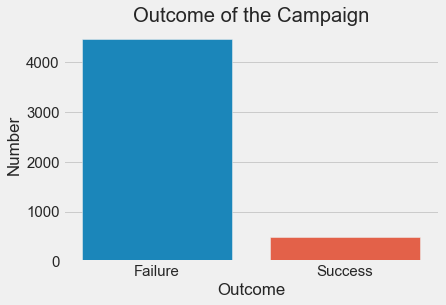

<Figure size 432x288 with 0 Axes>

In [9]:
sns.barplot(x=outcome.index, y=outcome.values)
plt.title('Outcome of the Campaign')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Outcome')
plt.ylabel('Number')
plt.show()
plt.savefig('outcome of the campagn.png')

## Distribution of the variables

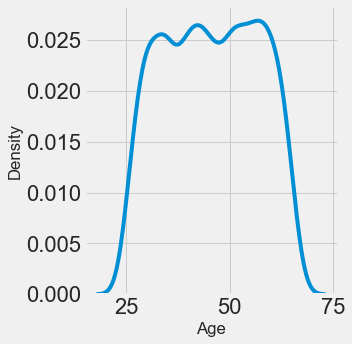

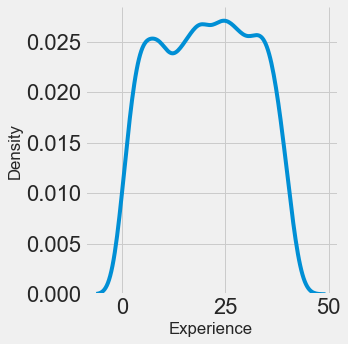

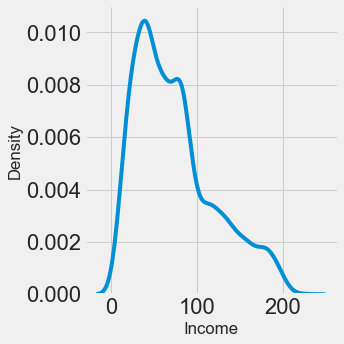

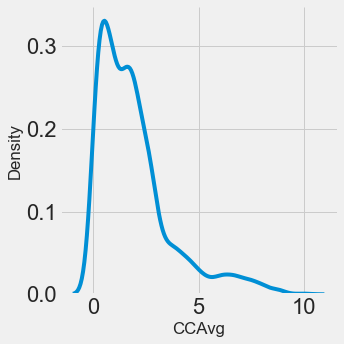

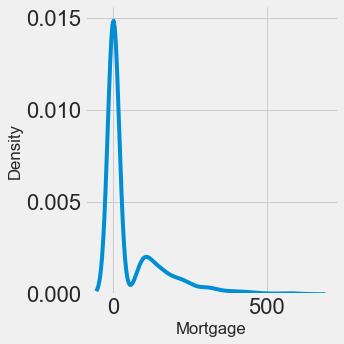

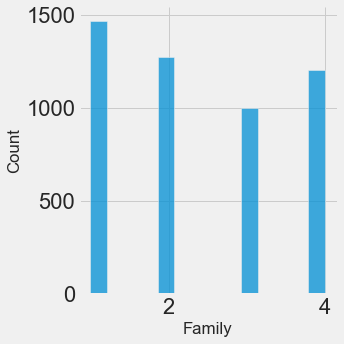

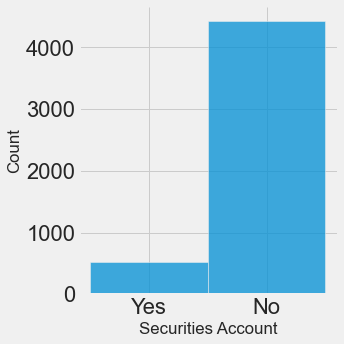

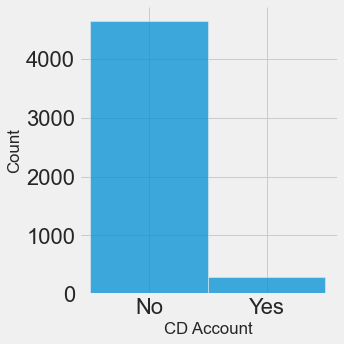

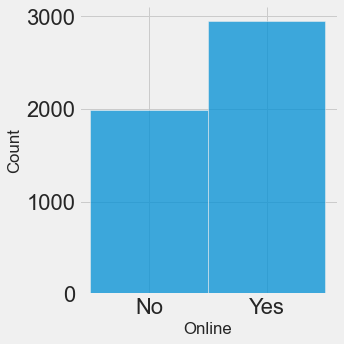

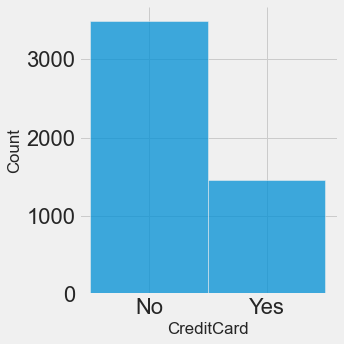

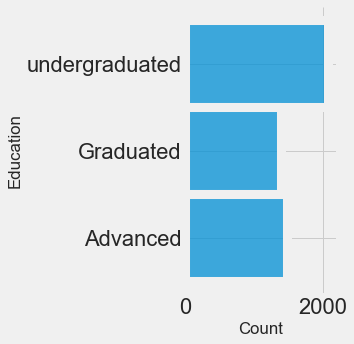

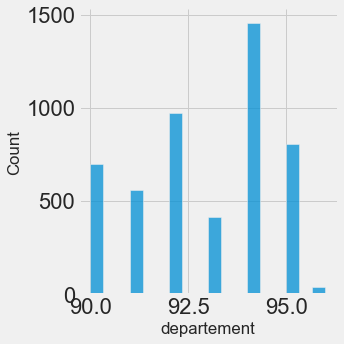

In [5]:
for i in ['Age', 'Experience','Income','CCAvg','Mortgage']:
    sns.displot(loans2, x=i,kind="kde",common_norm=False)
    
for i in ['Family','Securities Account','CD Account','Online', 'CreditCard']:
    sns.displot(loans2, x=i,kind="hist",common_norm=False)

sns.displot(loans2, y='Education',kind="hist",common_norm=False)
sns.displot(loans2, x='departement')

We are now going answer the questions asked for the evaluation and explore the key distributions in our sample.

In [31]:
rp.summary_cont(loans[['Age','Income','CCAvg','Mortgage','Experience','Family']])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Age,5000.0,45.3384,11.4632,0.1621,45.0206,45.6562
1,Income,5000.0,73.7742,46.0337,0.6510,72.4979,75.0505
2,CCAvg,5000.0,1.9379,1.7477,0.0247,1.8895,1.9864
3,Mortgage,5000.0,56.4988,101.7138,1.4385,53.6788,59.3188
4,Experience,5000.0,20.1046,11.4680,0.1622,19.7867,20.4225
5,Family,5000.0,2.3964,1.1477,0.0162,2.3646,2.4282


In [41]:
loans.dtypes

Age                     int64
Experience              int64
Income                  int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [26]:
rp.summary_cat(loans[['CreditCard','CD Account', 'Securities Account', 'Online','Personal Loan']])


,Variable,Outcome,Count,Percent
0,CreditCard,0,3530,70.60
1,,1,1470,29.40
2,CD Account,0,4698,93.96
3,,1,302,6.04
4,Securities Account,0,4478,89.56
5,,1,522,10.44
6,Online,1,2984,59.68
7,,0,2016,40.32
8,Personal Loan,Failure,4520,90.40
9,,Success,480,9.60


## Are age, income, education, etc. distributed similarly for customers who have security accounts and those who don't?

In [134]:
loans3=loans2.drop(["index"],axis=1)
testsSec=[]
import tabulate as t
for i in loans3.columns:
    x=st.mannwhitneyu(x=loans3[loans3["Securities Account"]=='Yes'][i],y=loans3[loans3["Securities Account"]=='No'][i])
    testsSec.append([i,x[0],x[1]])
    
print(t.tabulate(testsSec,headers=["Variable","test-statistic","p-value"],tablefmt="github"))

| Variable           |   test-statistic |      p-value |
|--------------------|------------------|--------------|
| Age                |      1.14234e+06 | 0.485482     |
| Experience         |      1.14193e+06 | 0.480244     |
| Income             |      1.13363e+06 | 0.374471     |
| Family             |      1.1014e+06  | 0.078269     |
| CCAvg              |      1.1044e+06  | 0.101648     |
| Education          |      1.12886e+06 | 0.305893     |
| Mortgage           |      1.14009e+06 | 0.446788     |
| Personal Loan      |      1.11886e+06 | 0.0590829    |
| Securities Account |      0           | 0            |
| CD Account         | 857694           | 7.88284e-112 |
| Online             |      1.11391e+06 | 0.128717     |
| CreditCard         |      1.11443e+06 | 0.115497     |
| departement        |      1.1386e+06  | 0.435775     |


The non-parametric test suggests that there is a significant difference between the distributions of CD Accounts for the group by Securities Account ownership. Furthermore, Average Credit Card spending seems to differ in distributions as well as the Family size. 

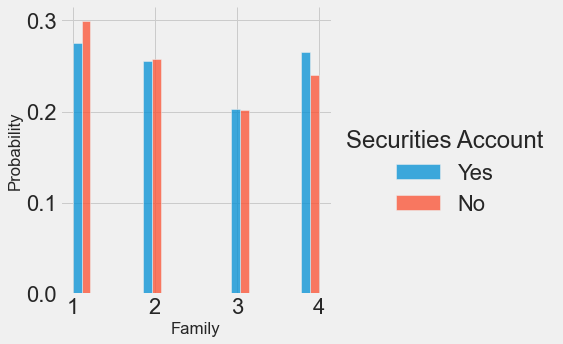

In [70]:
sns.displot(loans2, x="Family",hue="Securities Account",kind="hist",multiple="dodge",stat="probability",common_norm=False)

We see that the difference is very small for the family size. Only the probability to have no children is higher for people without a securities account. Plus the probability to have a family of four is slightly higher for people that have a savings account. 

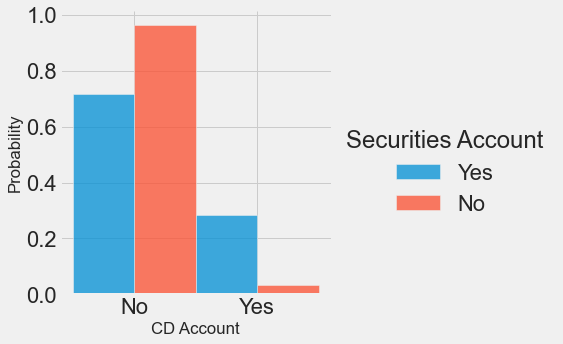

In [71]:
sns.displot(loans2, x="CD Account",hue="Securities Account",kind="hist",multiple="dodge",stat="probability",common_norm=False)

If you have a CD Account, chances are you also own a Securities account. This result is confirmed by the frequency table further below. 

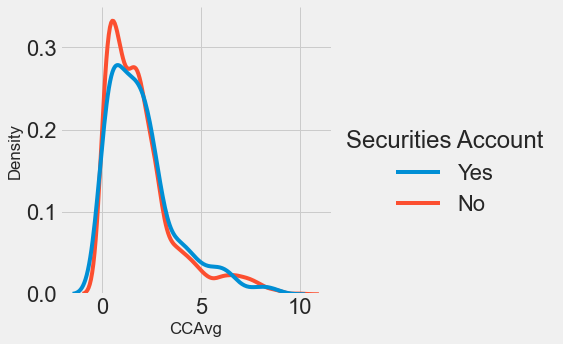

In [72]:
sns.displot(loans2, x="CCAvg",hue="Securities Account",kind="kde",common_norm=False)

The probability of spending little on Credit Cards on average has a spike close to zero for the people without a Securities account. Otherwise, the distributions look rather similar. This reflects the fact that people without an account usually also do not have the means to own credit card. 

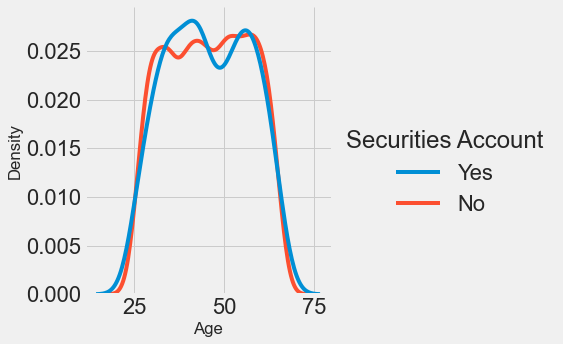

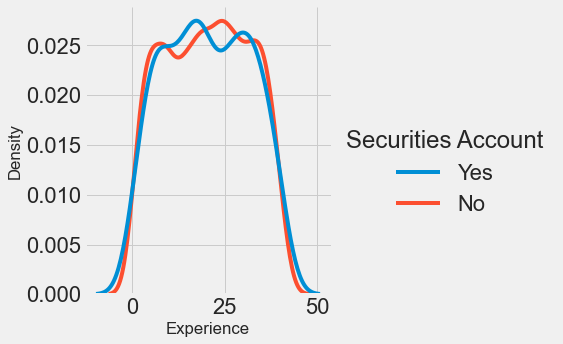

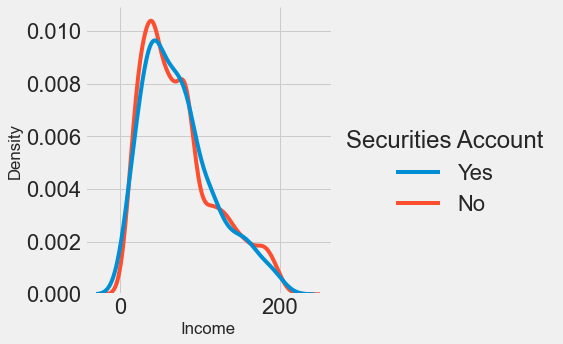

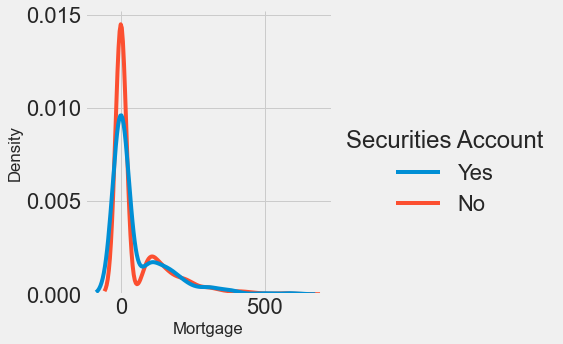

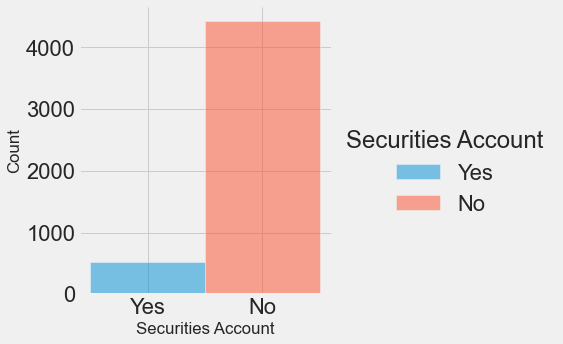

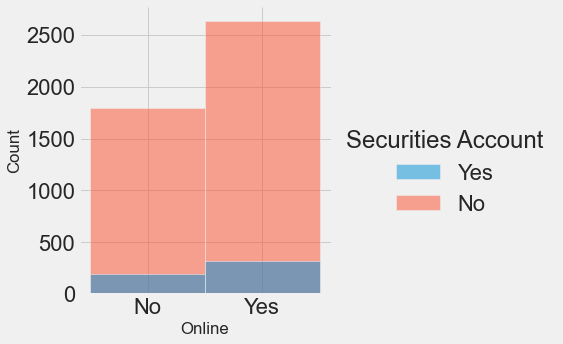

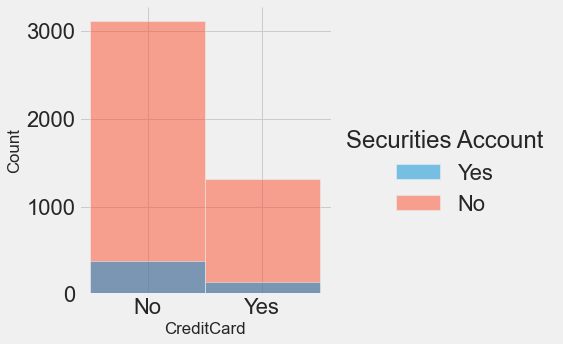

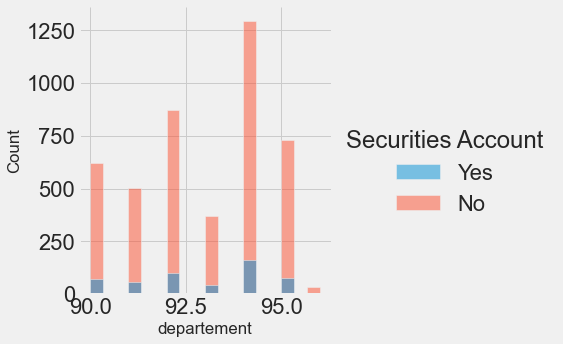

In [10]:
#Grouped analysis of the other variables

for i in ['Age', 'Experience','Income','Mortgage']:
    sns.displot(loans2, x=i,hue="Securities Account", kind="kde",common_norm=False)
    
for i in ['Securities Account','Online', 'CreditCard', 'departement']:
    sns.displot(loans2, x=i,hue="Securities Account", kind="hist",common_norm=False)


## Are age, income, education, etc. distributed similarly for customers who have CD accounts and those who don't? 

In [135]:
loans3=loans2.drop(["index"],axis=1)
testsCD=[]
import tabulate as t
for i in loans3.columns:
    x=st.mannwhitneyu(x=loans3[loans3["CD Account"]=='Yes'][i],y=loans3[loans3["CD Account"]=='No'][i])
    testsCD.append([i,x[0],x[1]])
    
print(t.tabulate(testsCD,headers=["Variable","test-statistic","p-value"],tablefmt="github"))

| Variable           |   test-statistic |      p-value |
|--------------------|------------------|--------------|
| Age                |           696978 | 0.424688     |
| Experience         |           694244 | 0.380707     |
| Income             |           461747 | 1.03995e-23  |
| Family             |           676216 | 0.137966     |
| CCAvg              |           511367 | 1.29611e-15  |
| Education          |           677986 | 0.147806     |
| Mortgage           |           624088 | 4.14049e-05  |
| Personal Loan      |           427666 | 1.38782e-109 |
| Securities Account |           415784 | 7.88284e-112 |
| CD Account         |                0 | 0            |
| Online             |           447458 | 8.65885e-36  |
| CreditCard         |           327491 | 9.8946e-87   |
| departement        |           666692 | 0.069368     |


Here the picture changes. Income is of course distributed differently: the less income you have, the more likely you are to not need a CD Account. As we already know from before, owning a Securities Account correlates strongly with owning a CD account. Anything related to bank services also has a vastly different distribution for CD Account owners. That makes sense. A CD Account is often a prerequisite to open a Securities account, to get a mortgage or obtain a credit card by your bank. 

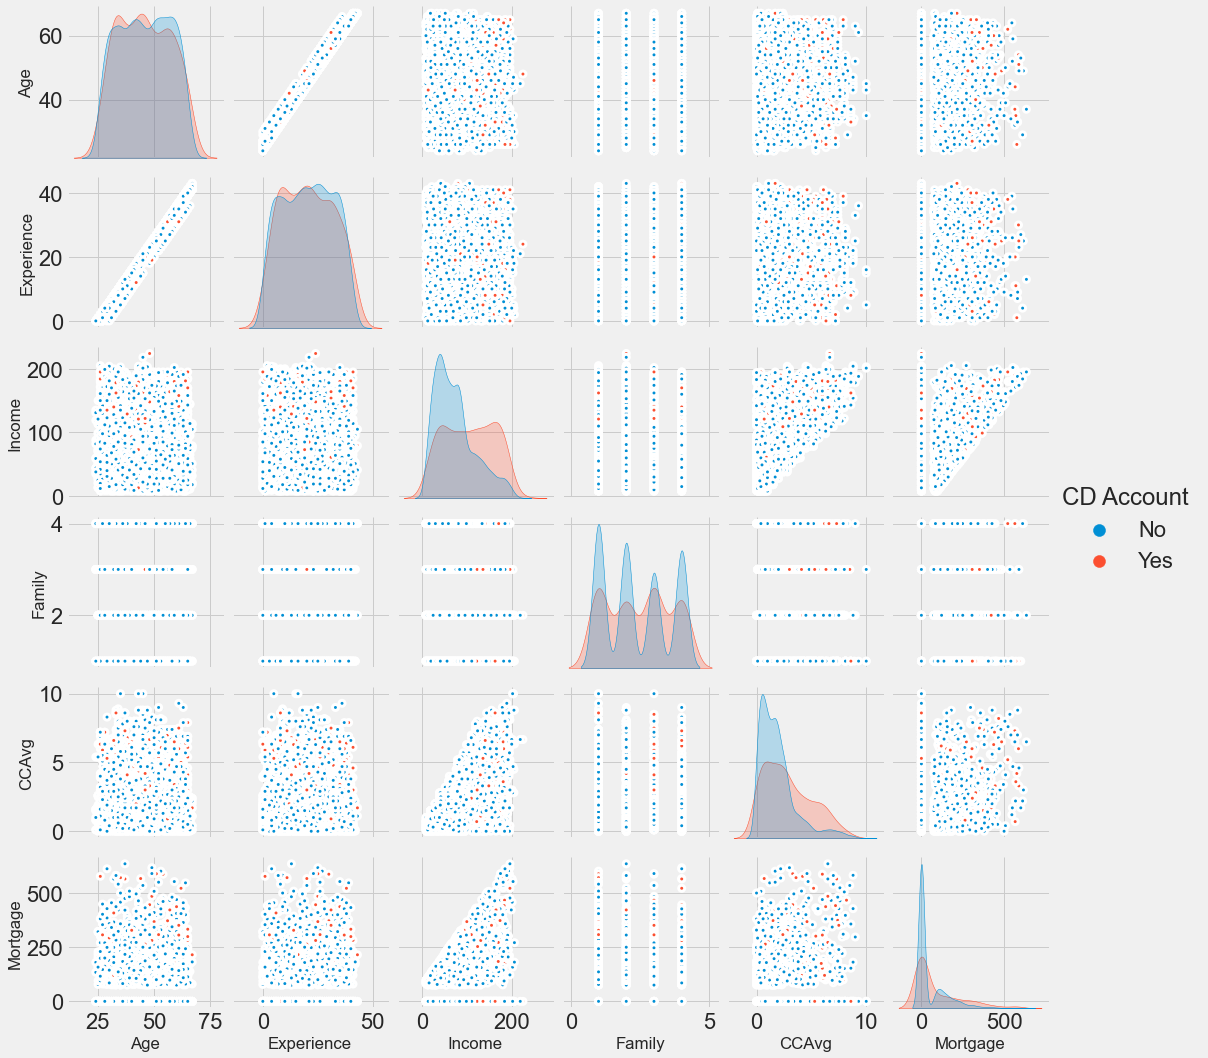

In [74]:

sns.pairplot(loans2.drop(["index"],axis=1),hue="CD Account",  plot_kws=dict(marker=".", linewidth=3),
    diag_kws=dict(common_norm=False))

Striking here is the skewedness of the mortgage distribution for the observations without a CD account. Apparently it is really hard to get a mortgage if you do not have CD Account. Furthermore,   it is interesting to note that the income is larger in the observations with a CD Account. 

In [156]:
pd.crosstab(loans2["Securities Account"], loans2["CD Account"])

CD Account,No,Yes
Securities Account,,
No,147,369
Yes,155,4277


Next, we see that 4277 observations in our sample have both accounts. Meanwhile $155+369=524$ have only on of the two accounts. Among those, the ones with only a CD account are more numerous.   

## What are the most important factors that lead to customers responding favorably to the marketing campaign?

We want to find what differentiates the constomers that picked up the loan from the ones that resisted. 

This table reports the results of a two-sided non-parametric Mann-Whitney U test on the difference of the distributions of all variables in the success and the failure group.   

In [136]:
loans3=loans2.drop(["index"],axis=1)
testsPL=[]
import tabulate as t
for i in loans3.columns:
    x=st.mannwhitneyu(x=loans3[loans3["Personal Loan"]=='Success'][i],y=loans3[loans3["Personal Loan"]=='Failure'][i])
    testsPL.append([i,x[0],x[1]])
    
print(t.tabulate(testsPL,headers=["Variable","test-statistic","p-value"],tablefmt="github"))

| Variable           |   test-statistic |      p-value |
|--------------------|------------------|--------------|
| Age                |      1.04268e+06 | 0.159364     |
| Experience         |      1.04304e+06 | 0.162345     |
| Income             | 167168           | 8.94985e-204 |
| Family             | 943904           | 3.95268e-06  |
| CCAvg              | 411768           | 1.10695e-109 |
| Education          | 795806           | 1.55762e-23  |
| Mortgage           | 964237           | 4.44569e-06  |
| Personal Loan      |      0           | 0            |
| Securities Account |      1.04772e+06 | 0.0590829    |
| CD Account         | 798440           | 1.38782e-109 |
| Online             |      1.06135e+06 | 0.332031     |
| CreditCard         |      1.06774e+06 | 0.422615     |
| departement        |      1.07113e+06 | 0.483755     |


Here, the non parametric test can help us again to find out where to look. We see that: 
1. Income 
2. Family Size
3. Credit card spending
4. Education
5. The Size of someones mortgage
6. CD account
are all variables that have significantly different distributions in among the people that picked up on the marketing campaign and those that did not pick it up. The distribution for Experience and Age is relatively similar in both groups. It is likely that the effect of those variables is then negligible with respect to the success of the marketing campaign.

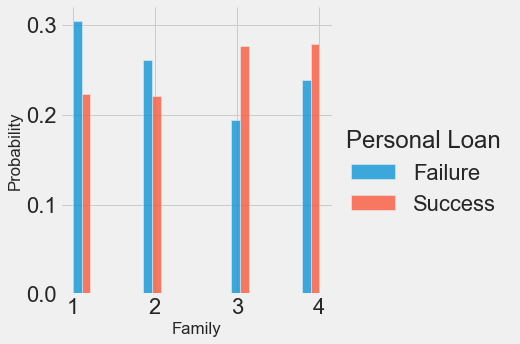

In [77]:
sns.displot(loans2, x="Family",hue="Personal Loan",kind="hist",multiple="dodge",stat="probability",common_norm=False)

In general, we can say that on average, the size of a family of a customer is higher in the success group relative to the failure group. An interpretation could be that kids are an investment and require a lot of things such that parents might prefer to take out a loan today and pay it off later when the kids have left the house and have found a job. 

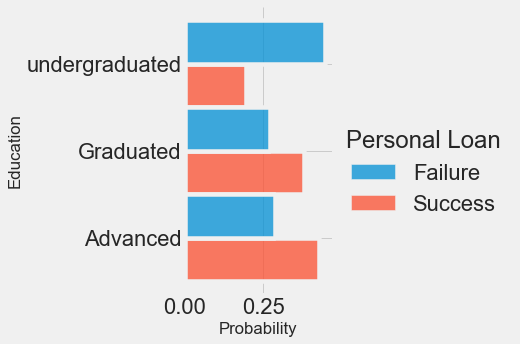

In [82]:
sns.displot(loans2, y="Education",hue="Personal Loan",kind="hist",multiple="dodge",stat="probability",common_norm=False)

Since education is strongly correlated with education, we are not surprised to see that a customer with a worse education responded less to the marketing campaign than one with a strong professional education. 

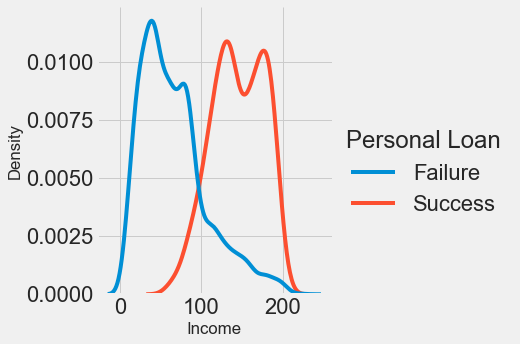

In [83]:
sns.displot(loans2, x="Income",hue="Personal Loan",kind="kde",common_norm=False)

Money makes the world go round. If you have a strong income that works as a collateral and allows you to take out a loan. It is therefore not surprising to see that the median income is much higher in the Success group than in the failure group. 

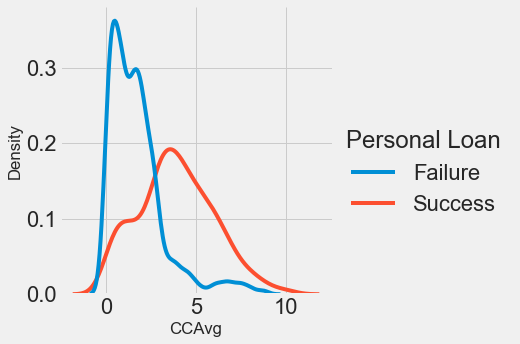

In [79]:
sns.displot(loans2, x="CCAvg",hue="Personal Loan",kind="kde",common_norm=False)

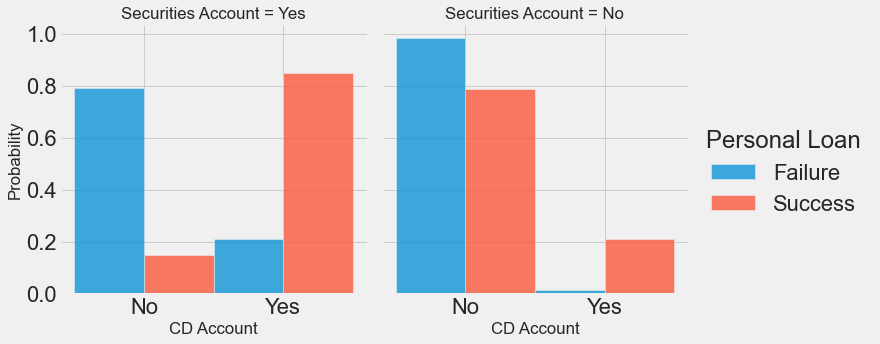

In [84]:
sns.displot(loans2, x="CD Account",hue="Personal Loan",col="Securities Account",kind="hist",multiple="dodge",stat="probability",common_norm=False)

Lastly, we can say that having a Securities account and a CD Account at the same time and is a strong sign for someone to respong positively to the marketing campaign. 

## Machine Learning Algorithm



In [122]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve 
from sklearn.model_selection import KFold, train_test_split, GridSearchCV

First of all, want to program a simple machine learning algorithm using a DecisionTreeClassifier. For the basic validation of our result, we resort to a standard split sample approach. We then apply post estimation cost-complexity-pruning two find the optimal restriction on the complexity of our decision tree. 

In [125]:
Y=loans['Personal Loan']
X=loans.drop('Personal Loan',axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, shuffle=True)
tree=DecisionTreeClassifier()
path = tree.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
trees= []
for ccp_alpha in ccp_alphas:
    ccp_tree = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    ccp_tree.fit(X_train, Y_train)
    trees.append(ccp_tree)
    print(confusion_matrix(Y_test,ccp_tree.predict(X_test)))
    print(accuracy_score(Y_test,ccp_tree.predict(X_test)))


[[1352   12]
 [  17  119]]
0.9806666666666667
[[1353   11]
 [  17  119]]
0.9813333333333333
[[1353   11]
 [  17  119]]
0.9813333333333333
[[1354   10]
 [  17  119]]
0.982
[[1355    9]
 [  17  119]]
0.9826666666666667
[[1355    9]
 [  17  119]]
0.9826666666666667
[[1355    9]
 [  17  119]]
0.9826666666666667
[[1355    9]
 [  17  119]]
0.9826666666666667
[[1354   10]
 [  17  119]]
0.982
[[1354   10]
 [  17  119]]
0.982
[[1352   12]
 [  17  119]]
0.9806666666666667
[[1352   12]
 [  17  119]]
0.9806666666666667
[[1352   12]
 [  18  118]]
0.98
[[1352   12]
 [  18  118]]
0.98
[[1352   12]
 [  18  118]]
0.98
[[1352   12]
 [  18  118]]
0.98
[[1352   12]
 [  18  118]]
0.98
[[1353   11]
 [  18  118]]
0.9806666666666667
[[1353   11]
 [  18  118]]
0.9806666666666667
[[1354   10]
 [  18  118]]
0.9813333333333333
[[1354   10]
 [  14  122]]
0.984
[[1351   13]
 [  12  124]]
0.9833333333333333
[[1350   14]
 [   8  128]]
0.9853333333333333
[[1353   11]
 [   8  128]]
0.9873333333333333
[[1353   11]
 [   

We calculate the accuracy and the confusion matrix of the basic estimator for different specifications of the cost-complexity pruning parameter alpha. The results are plotted below. We show the number of nodes and the depth of the tree in relation to the parameter alpha. The more restricted the mdoel becomes, the less deep it is and the less nodes it has. 

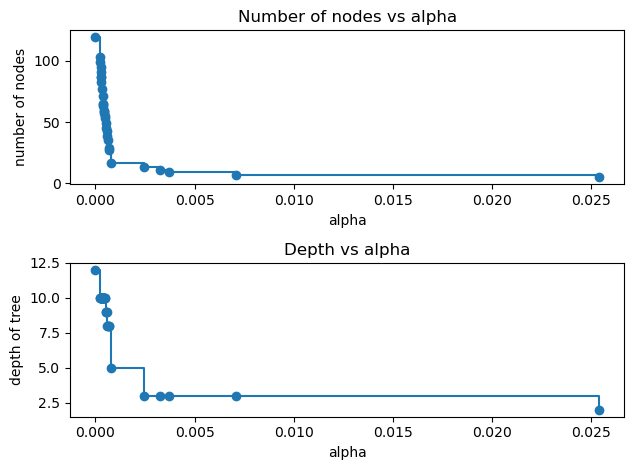

In [126]:
## For better readbility on the graphs
plt.style.use('default')
trees = trees[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [ccp_tree.tree_.node_count for ccp_tree in trees]
depth = [ccp_tree.tree_.max_depth for ccp_tree in trees]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

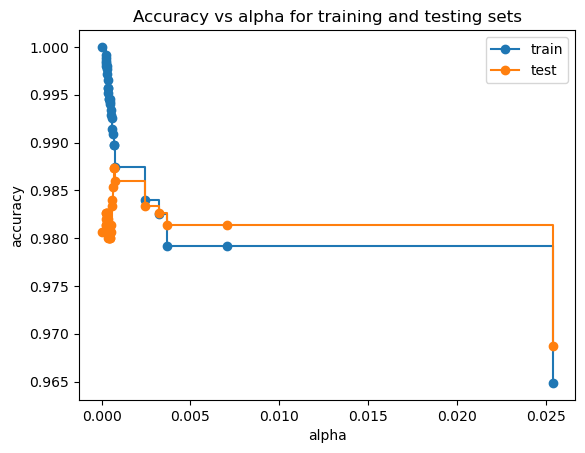

In [127]:
train_scores = [ccp_tree.score(X_train, Y_train) for ccp_tree in trees]
test_scores = [ccp_tree.score(X_test, Y_test) for ccp_tree in trees]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

The above graphic shows the accuracy for different alphas on our training and our test set. We conclude that the alpha should be set very low for a good performance on the test set. 

Now we try a different approach. We want to implement a grid search for the optimal min_sample_split, max_depth and min_sample_leaf meta-parameters. The problem with the previous approach is that depending on the split you randomly draw with train_test_split function, this can give vastly different results. To reduce this variability we are going to refine our resampling methods by using kfold cross-validation and a grid search for the best algorithm.

In [128]:
Dt_CV=DecisionTreeClassifier(random_state=0)
cv_folds= KFold(5,shuffle=True,random_state=0)
Dt_CV_params = {'min_samples_split':range(2,50,1), "max_depth":range(2,50,1),"min_samples_leaf":range(1,15,1),"min_samples_split":range(2,20,1)}
Grid_search = GridSearchCV(Dt_CV,Dt_CV_params,cv=cv_folds)
Grid_search.fit(X,Y)
print(Grid_search.best_estimator_)
print(Grid_search.best_score_)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=4, min_samples_split=9,
                       random_state=0)
0.9858


Here, we optimize the accuracy of our DecisionTreeClassifier over a different model specifications given by the parameter dictionary Dt_CV_params. The search produces as a model specification a classifier with maximum depth of seven, specific minimum number of samples required to split an internal node of 9 and a minimum number of samples required to be at a leaf node of 4.    

In [130]:

print(confusion_matrix(Y_test,Grid_search.predict(X_test)))
print(accuracy_score(Y_test,Grid_search.predict(X_test)),Grid_search.best_score_)

[[1364    0]
 [   8  128]]
0.9946666666666667 0.9858


We find an accuracy of 99.2% on our test set which is even higher than the best score wee found in the cross validated grid search. Furthermore, we report the confusion matrix for our estimator on the test set. 